In [1]:
import pandas as pd
data=pd.read_csv('twitter_training.csv',names=['id','company','sentiment','text'])

In [2]:
data.head()

,id,company,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
data.shape

(74682, 4)

In [4]:
data.isnull().sum()

id             0
company        0
sentiment      0
text         686
dtype: int64

In [5]:
data.ffill(inplace=True)

In [6]:
data.isnull().sum()

id           0
company      0
sentiment    0
text         0
dtype: int64

<Axes: xlabel='count', ylabel='sentiment'>

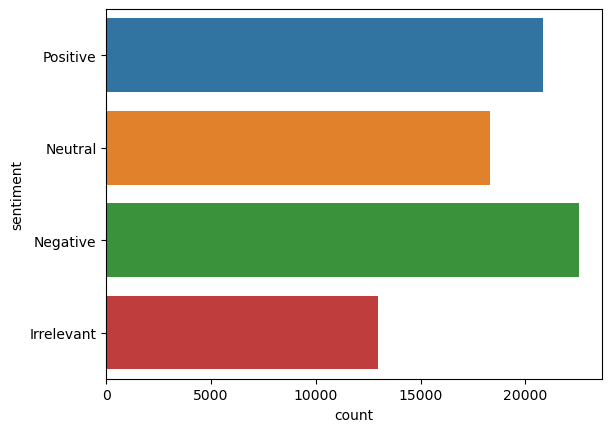

In [7]:
import seaborn as sns 
sns.countplot(y='sentiment',data=data)

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

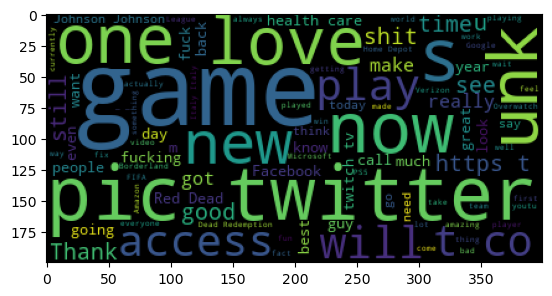

In [9]:
text=data.text.tolist()
wordcloud=WordCloud().generate(str(text))
plt.imshow(wordcloud)

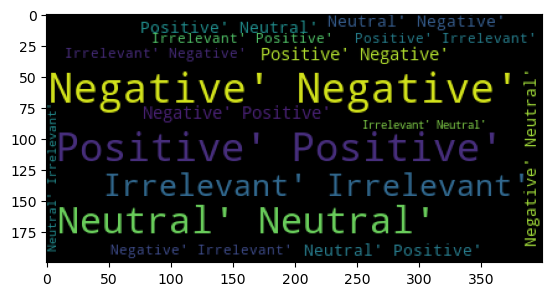

In [10]:
label=data.sentiment.tolist()
labels=WordCloud().generate(str(label))
plt.imshow(labels)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import pandas as pd

# Assuming you have already downloaded the necessary NLTK data
# nltk.download('stopwords')

stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocessing_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    
    
    # Remove URLs using regular expressions
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Count HTML tags
    
    
    # Remove HTML tags using regular expressions
    text = re.sub(r'<.*?>', '', text)
    
    # Keep only alphabetical characters and whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return text

In [16]:
corpus=data['text'].apply(preprocessing_text).tolist()

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder().fit_transform(data['sentiment']).tolist()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(corpus,labelencoder,test_size=0.1,random_state=42)

In [25]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification



In [29]:
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)
xtrain=tokenizer.batch_encode_plus(x_train,padding=True,truncation=True,max_length=120,return_tensors='tf')
xtest=tokenizer.batch_encode_plus(x_test,padding=True,truncation=True,max_length=120,return_tensors='tf')


In [44]:
model=TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=4)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:

# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
import numpy as np
# Step 5: Train the model
history = model.fit(
    [tf.stack(xtrain['input_ids']), tf.stack(xtrain['token_type_ids']), tf.stack(xtrain['attention_mask'])],
    np.array(labelencoder[:67213]),
    batch_size=32,
    epochs=3
)

Epoch 1/3
   4/2101 [..............................] - ETA: 25:51:15 - loss: 1.3954 - accuracy: 0.2969